In [26]:
from spellchecker import SpellChecker
import pandas as pd
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import emoji
import re
from spellchecker import SpellChecker
from nltk.corpus import stopwords
import string
from nltk.tokenize import WordPunctTokenizer




def count_spelling_errors(text):
    """
    Count the number of spelling errors in a text.

    Parameters
    ----------
    text : str
        The text to be analyzed.
        
    Returns
    -------
    int
        The number of spelling errors in the text.
    """
    tokens = text.split()
    spell = SpellChecker()
    misspelled = spell.unknown(tokens)
    return len(misspelled)

def preprocess(text):
    """
    Preprocesses a story by removing emojis, punctuations, stopwords, spellchecking the words.

    Parameters
    ----------
    text : str
        The story to be preprocessed.
    Returns
    -------
    processed_text : str
        The preprocessed story.
    """
    stop_words = set(stopwords.words('english'))
    punc = set(string.punctuation)
    tokenizer = WordPunctTokenizer()

    # regex to replace all consecutive occurences of punctuations with a single punctuation
    pattern = r'([' + re.escape(''.join(punc)) + r'])\1+'
    text = re.sub(pattern, r'\1', ''.join(text))

    # regex to remove all numbers
    text = re.sub(r'\d+', '', text)

    # tokenize the text
    tokens = tokenizer.tokenize(text.lower())
    # remove stopwords, punctuations, emojis, correct and lemmatize the words
    tokens = [token for token in tokens if emoji.is_emoji(token) == False]
    tokens = [token for token in tokens if token not in stop_words]
    tokens = [token for token in tokens if token not in punc]
    tokens = [token for token in tokens if token]

    processed_text = ' '.join(tokens)
    return processed_text

In [27]:
file = open("data/stories.csv", "r")
stories_array = []
for line in file:
    stories_array.append(line)
file.close()

tqdm.pandas()
df = pd.DataFrame(stories_array, columns=['story'])

df['spell_errors'] = df['story'].progress_apply(count_spelling_errors)

  0%|          | 0/3495 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [ ]:
df['processed_story'] = df['story'].progress_apply(preprocess)
df.to_csv('data/preprocessed_stories_without_lemmatization_or_autocorrect.csv', index=False)
df

  0%|          | 0/3495 [00:00<?, ?it/s]

,story,spell_errors,processed_story
0,I accepted a friend request on Facebook becaus...,43,accepted friend request facebook common friend...
1,"Whatsapp message: Good morning,Aaron here ya😊 ...",22,whatsapp message good morning aaron ya receive...
2,"I met Alan on Bumble, where he claimed to be a...",30,met alan bumble claimed project manager synerg...
3,I connected with a person named Arno on the CM...,61,connected person named arno cmb app june norma...
4,"A person with the online name ""June lee"" initi...",29,person online name june lee initially contacte...
...,...,...,...
3490,I'm being deceived. Look like a got hypnosis. ...,7,deceived look like got hypnosis send fake rece...
3491,Linked up with a lady called Xue Er in Wechat....,28,linked lady called xue er wechat made appointm...
3492,The online platform was not a real trading pla...,25,online platform real trading platform know des...
3493,Long story short..ive known this guy name rich...,19,long story short ive known guy name richard cl...


In [28]:
# Plot the distribution of spelling errors
plt.hist(df['spell_errors'], bins=range(0, 100, 1), color='#C67')
plt.title('Distribution of Spelling Errors')
plt.xlabel('Number of Spelling Errors')
plt.ylabel('Number of Stories')
plt.show()

KeyError: 'spell_errors'

In [29]:
speller = SpellChecker()
speller.correction('faurd')

'found'

In [30]:
print(df['spell_errors'].describe())
print("Number of spelling mistakes:", df['spell_errors'].sum())
print("Total number of tokens", df['story'].str.split().str.len().sum())

KeyError: 'spell_errors'

In [31]:
df['length'] = df['story'].apply(lambda x: len(x.split()))

print(df['length'].describe())

count    3495.000000
mean      144.684406
std       107.904735
min         3.000000
25%        62.000000
50%       114.000000
75%       196.000000
max       586.000000
Name: length, dtype: float64


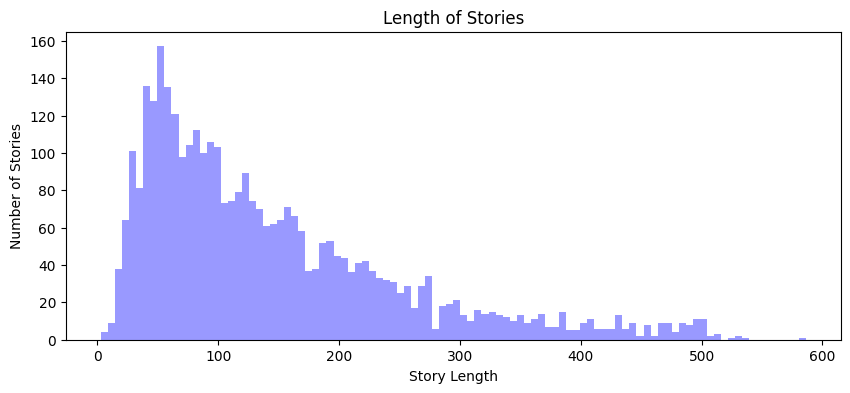

In [49]:
# plot story length histogram

plt.figure(figsize=(10, 4))
plt.hist(df['length'], bins=100, color='b', alpha=0.4)
plt.xlabel('Story Length')
plt.ylabel('Number of Stories')
plt.title('Length of Stories')
plt.savefig('../thesis/Project/thesis/resources/story_length.png')
plt.show()